In [1]:
### Importing the required libraries
# Pandas for analysing the csv
import pandas as pd

# Matplotlib and seaborn for ploting it
import matplotlib.pyplot as plt
import seaborn as sns

# For taking care of warnings
import warnings
warnings.filterwarnings('ignore')

# For train-test-split
import sklearn
from sklearn.model_selection import train_test_split

# For Feture Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# For training the model
import statsmodels.api as sm

# For calculating the variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For evaluating r2 for test data
from sklearn.metrics import r2_score

### Exploratory Data Analysis

In [2]:
df=pd.read_csv('day.csv')
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
df.shape

(730, 16)

In [4]:
df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
## Validating if any null value is present
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
# Extracting Day_of_Month from the dteday column entry
df['day_of_month']=pd.DatetimeIndex(df['dteday']).day
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  day_of_month  
0   985             1  
1   801             1  
2  1349             1  
3  1562             1  
4  1600             1

In [8]:
# Dropping the dteday column as we already have day,mnth and yr columns
# Dropping the instant column too, as it will not be of any use
df=df.drop(['dteday','instant'],axis=1)
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  day_of_month  
0  18.18125  80.5833  10.749882     331         654   985             1  
1  17.68695  69.6087  16.652113     131         670   801             1  
2   9.47025  43.7273  16.636703     120        1229  1349             1  
3  10.60610  59.0435  10.739832     108        1454  1562             1  
4  11.46350  43.6957  12.522300      82        1518  1600             1

In [9]:
df.shape

(730, 15)

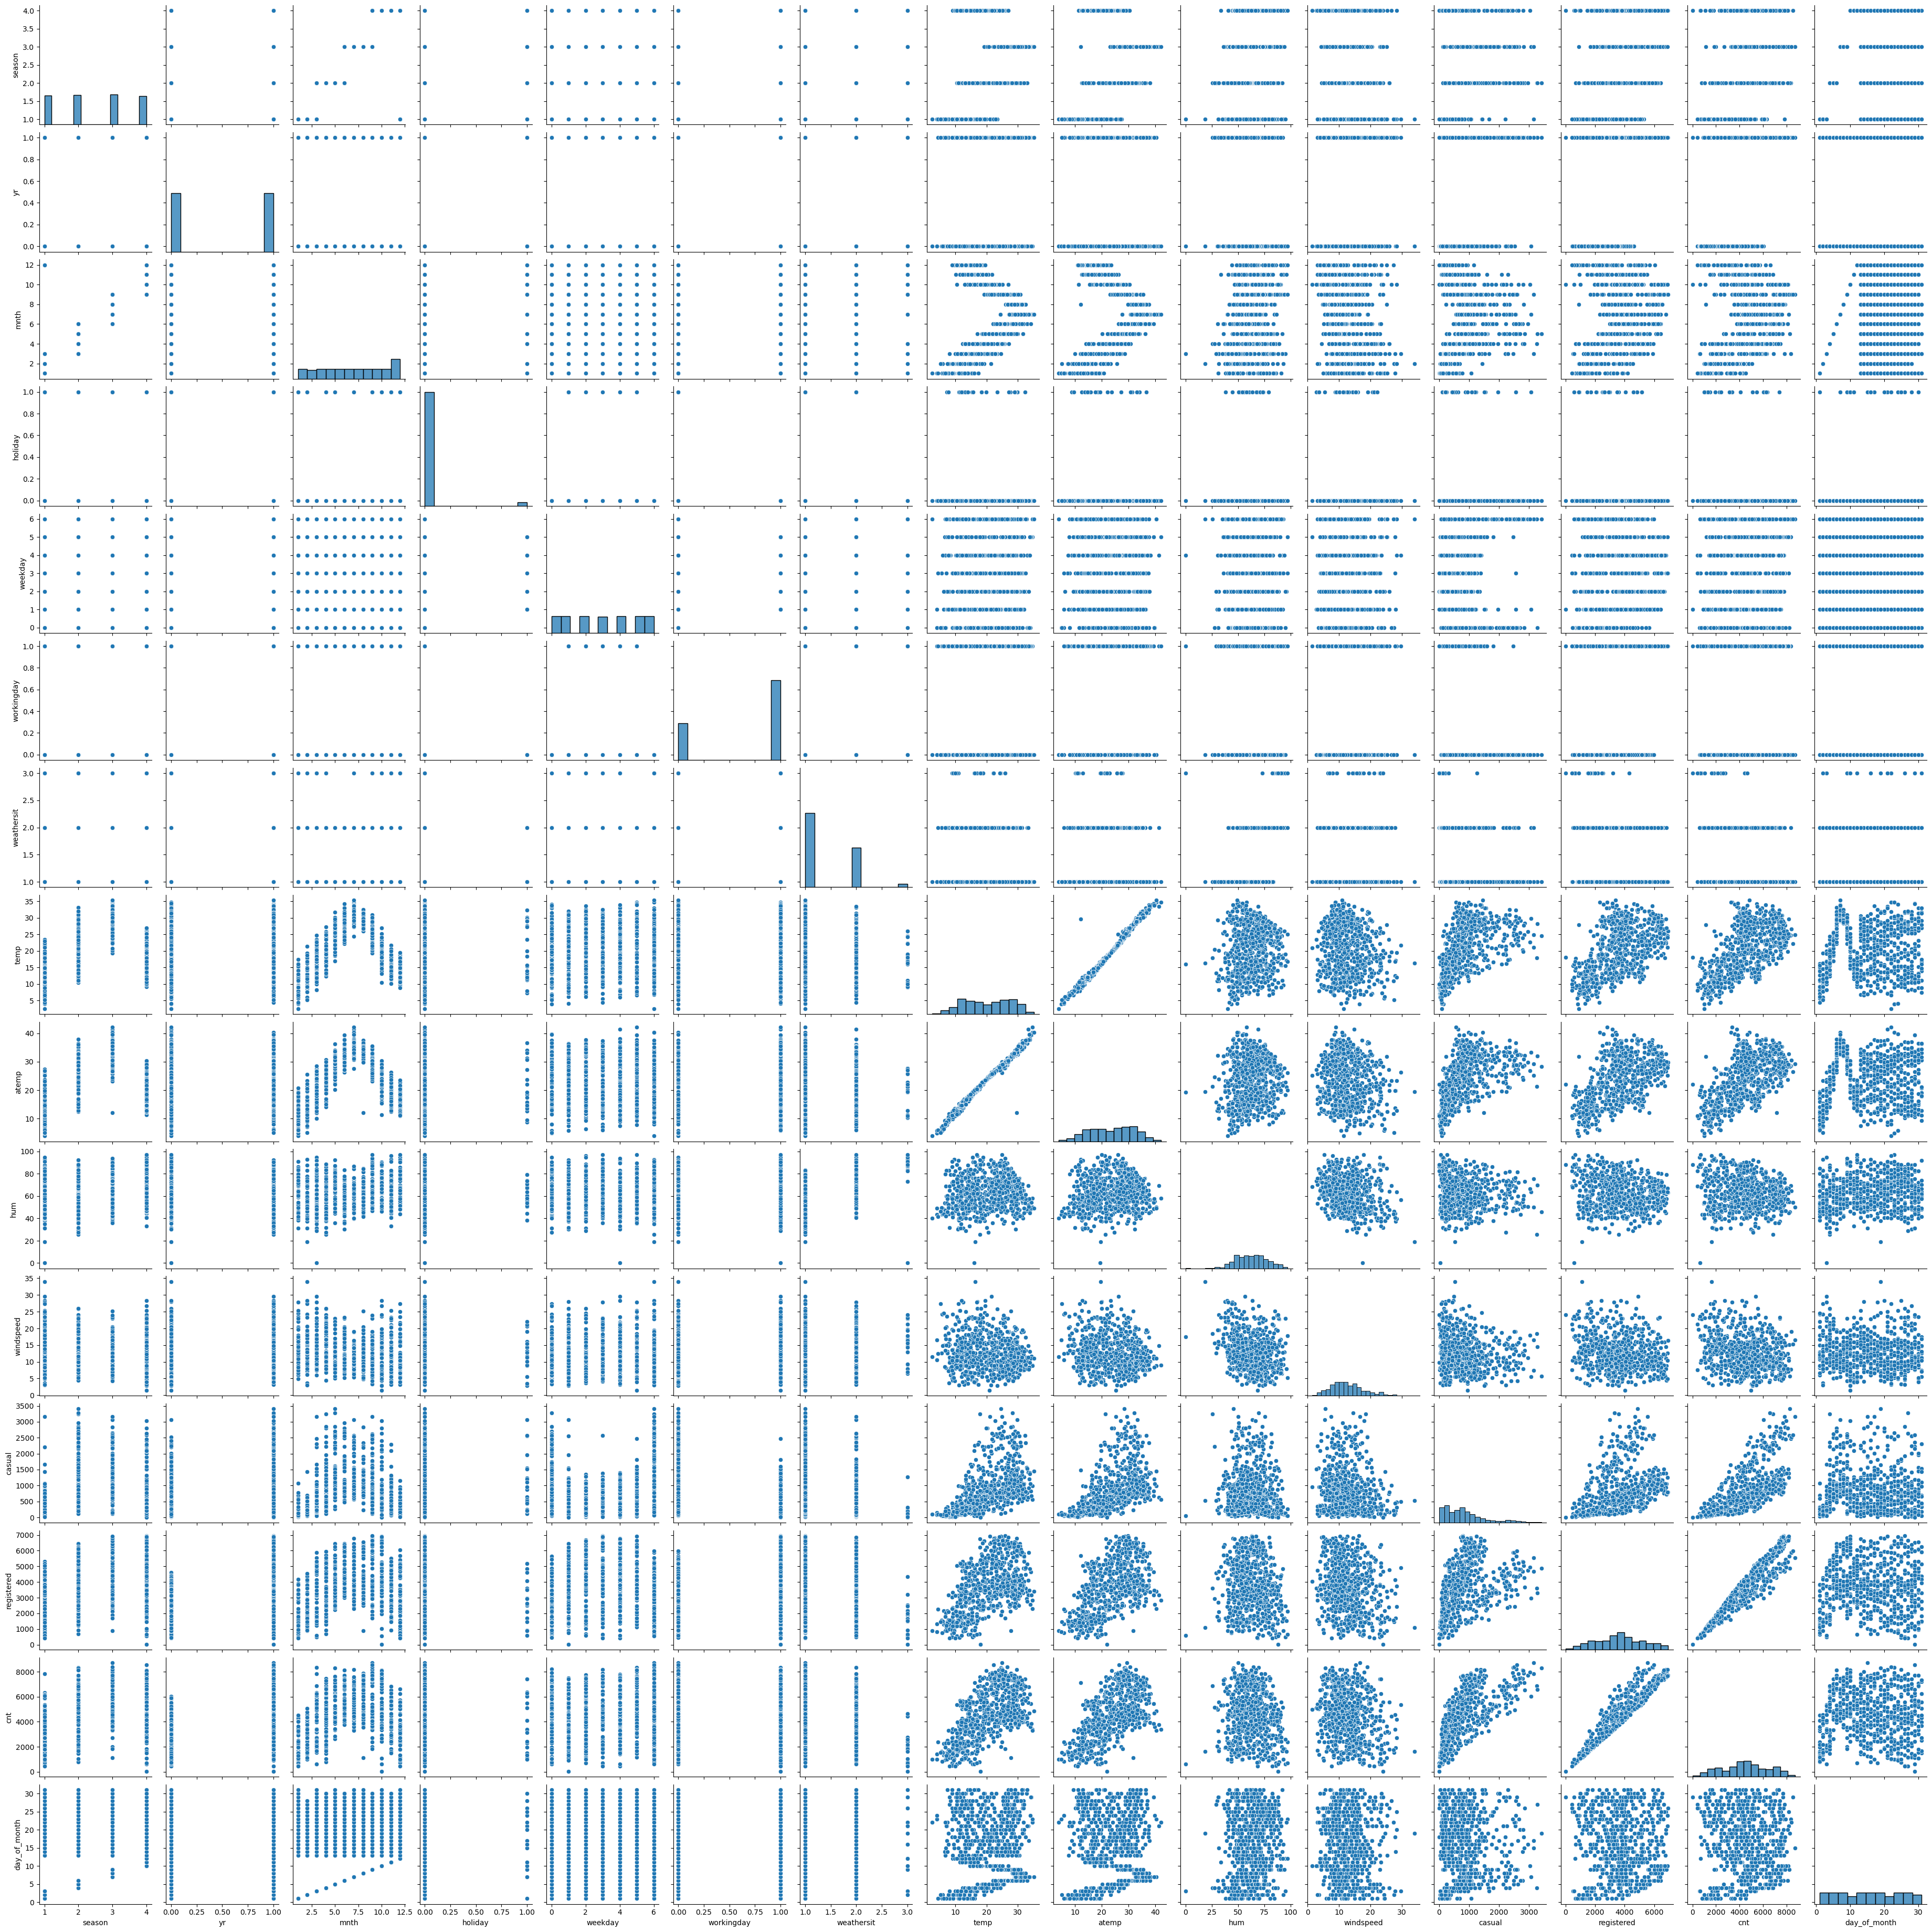

In [10]:
#visualizing the pairplot of all columns
sns.pairplot(data=df)

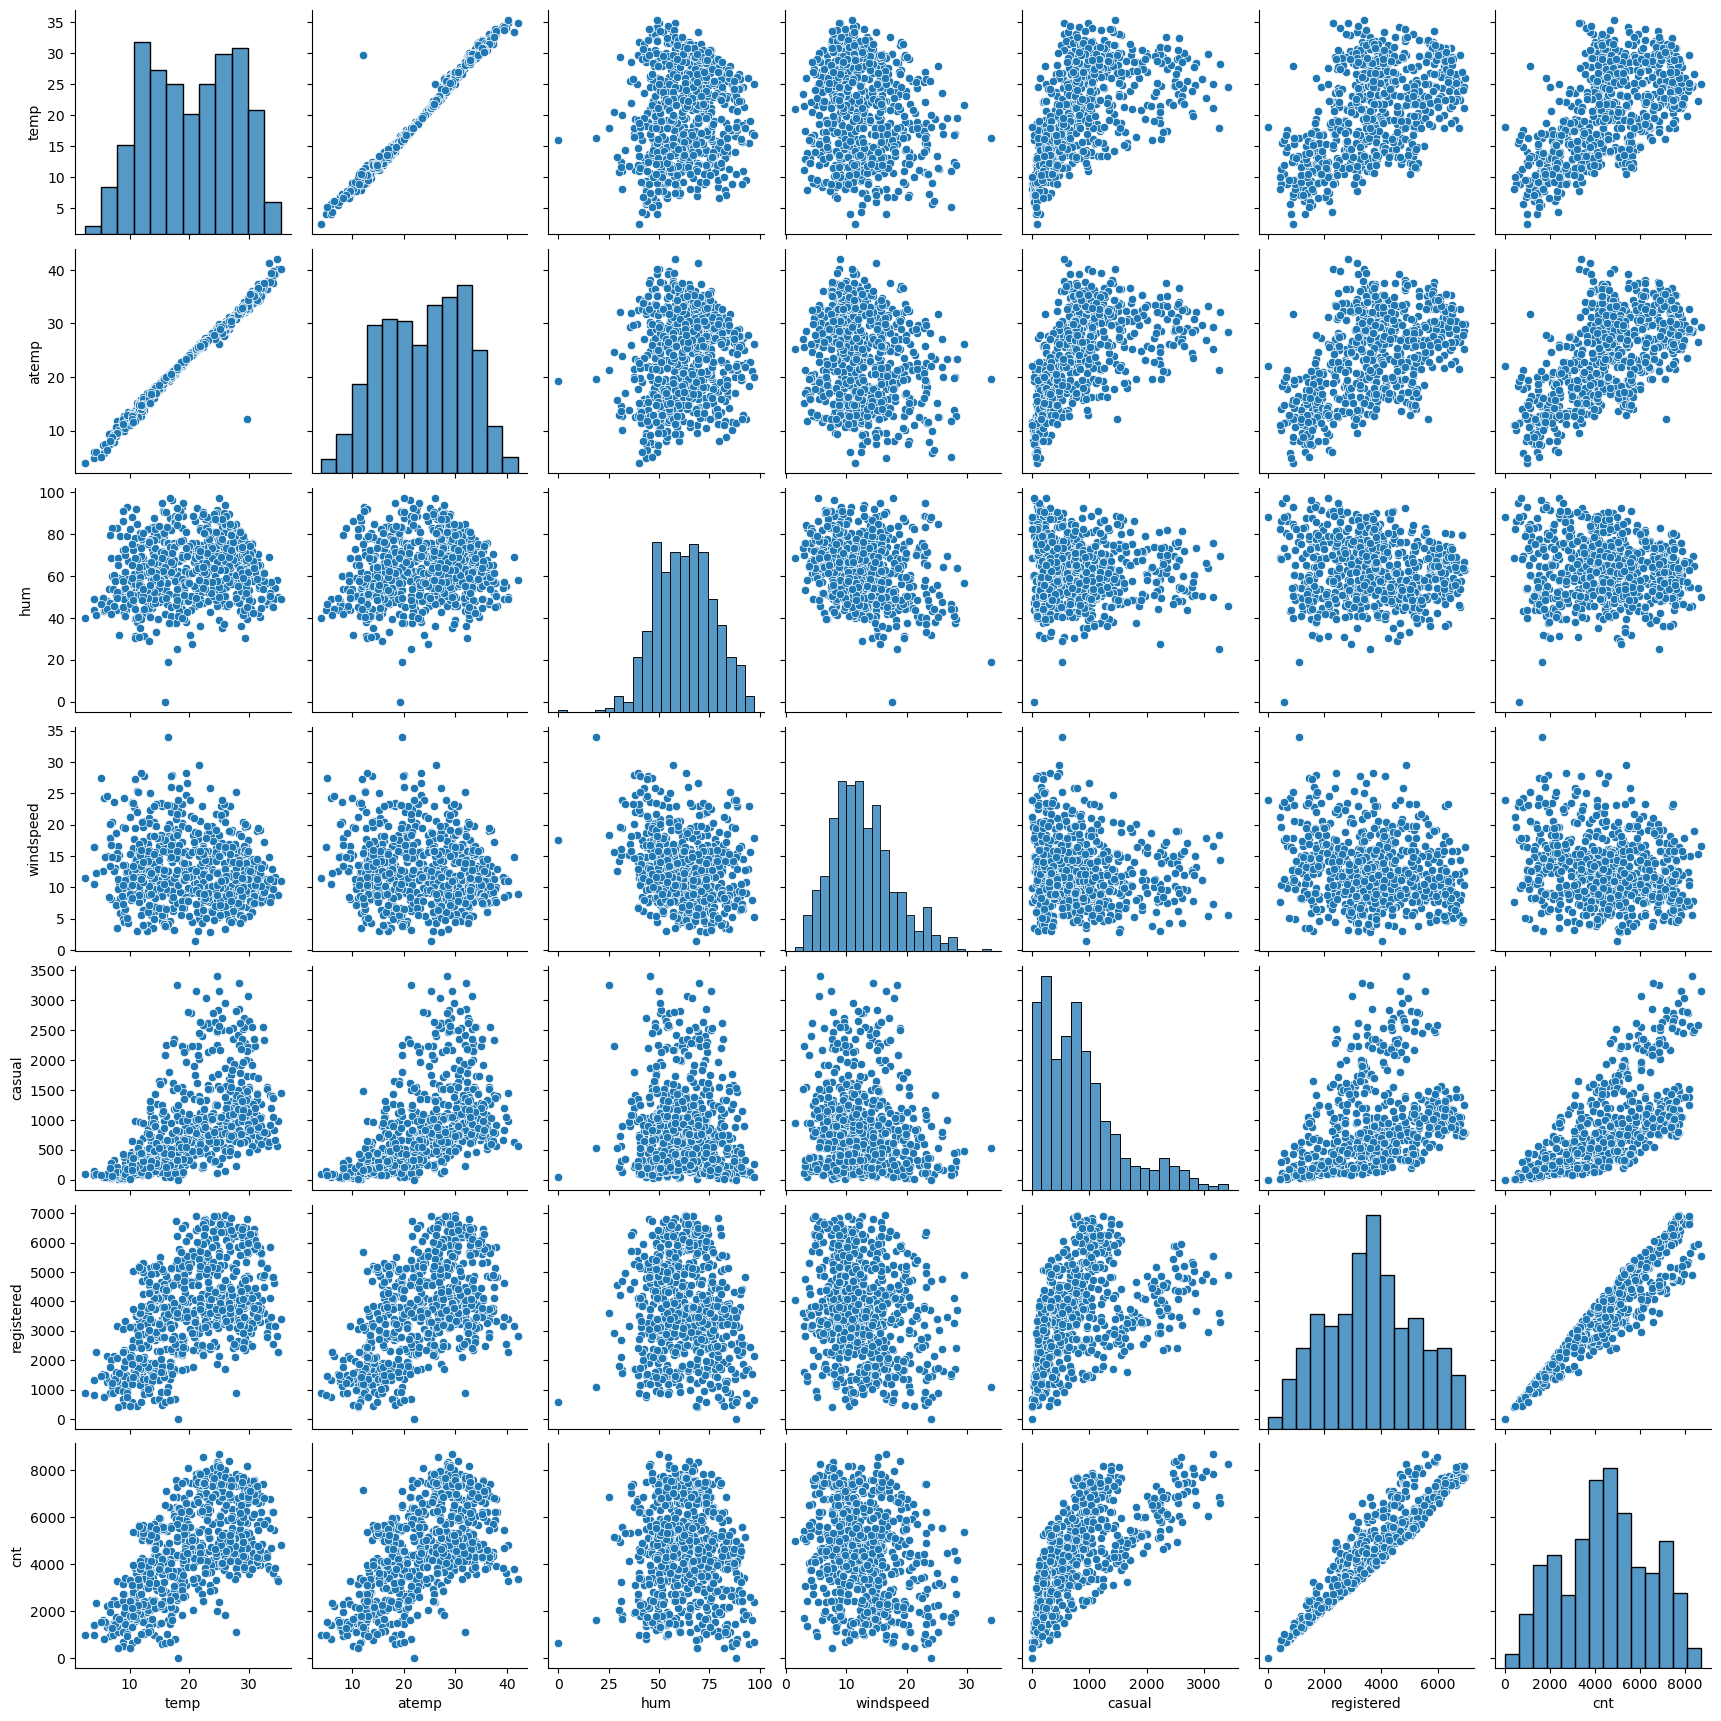

In [56]:
#visualizing the pairplot of numeric columns
sns.pairplot(data=df[['temp','atemp','hum','windspeed','casual','registered','cnt']])

In [11]:
# Working on categorizing the columns as per their type: continuous(cont), categorical(cat) and target
# First getting the unqiue values per columns
df.nunique()

season            4
yr                2
mnth             12
holiday           2
weekday           7
workingday        2
weathersit        3
temp            498
atemp           689
hum             594
windspeed       649
casual          605
registered      678
cnt             695
day_of_month     31
dtype: int64

In [12]:
# Binning them
cat_col=['season','yr','mnth','holiday','weekday','workingday','weathersit','day_of_month']
cont_col=['temp','atemp','hum','windspeed','casual','registered']
target_col=['cnt']

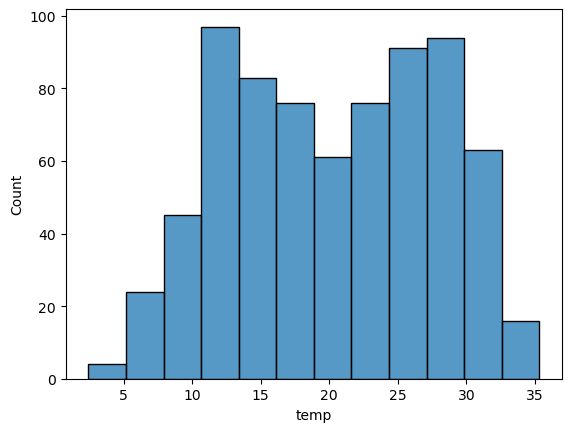

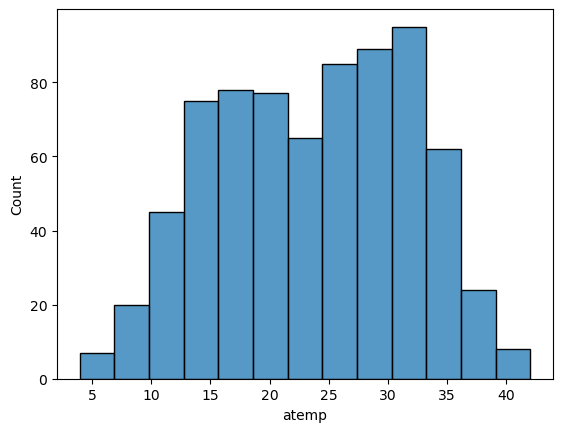

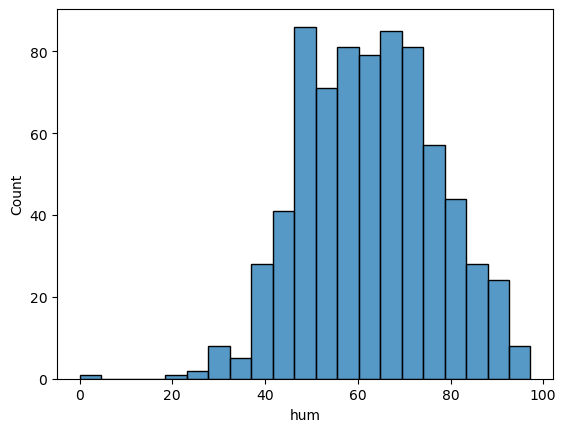

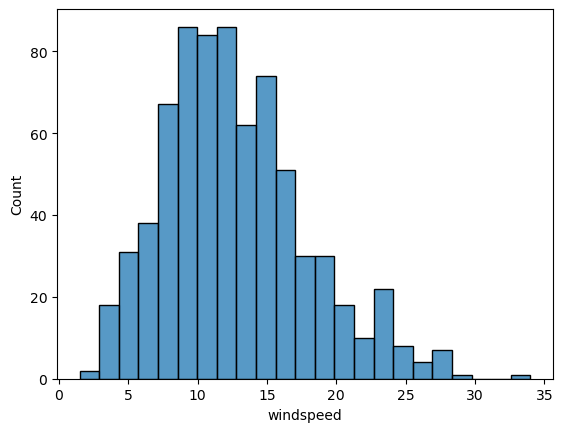

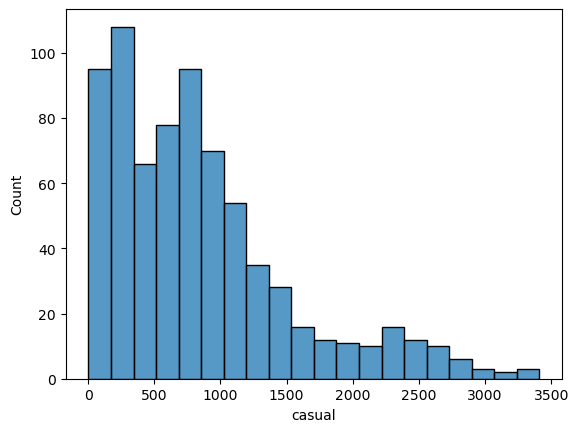

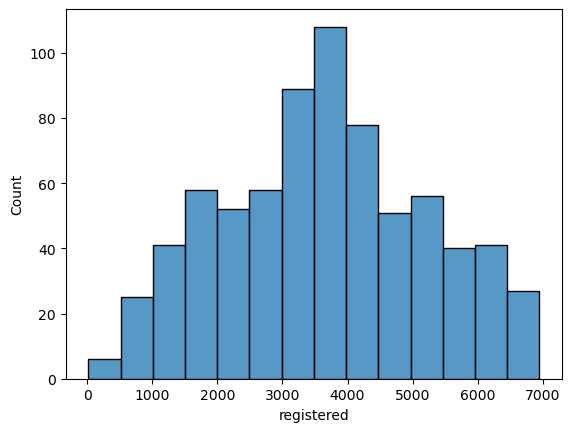

In [13]:
# Using For loop we would be plotting the continuous columns
for i in cont_col:
    sns.histplot(x=df[i])
    plt.show()

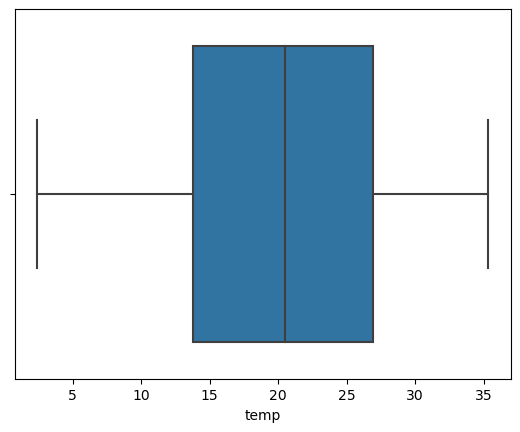

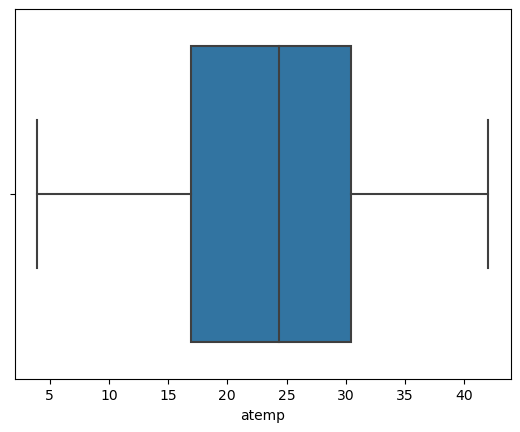

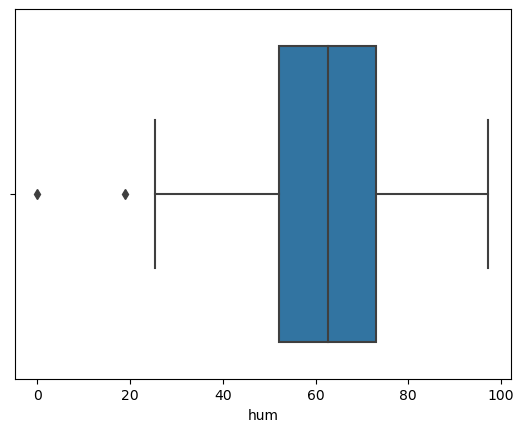

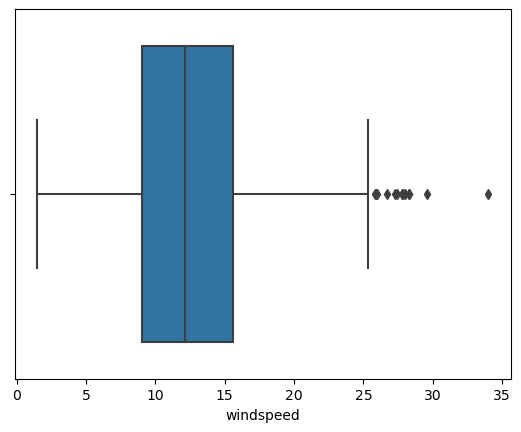

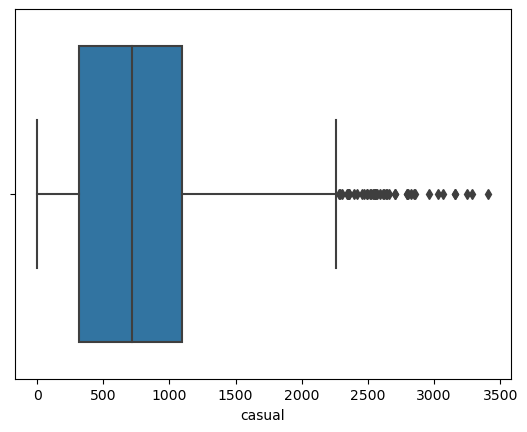

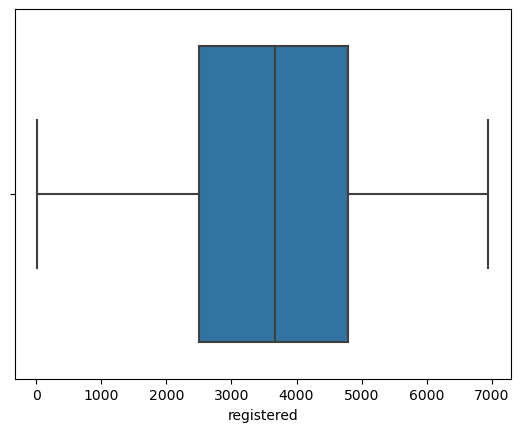

In [14]:
# Checking the spread using boxplot
for i in cont_col:
    sns.boxplot(x=df[i])
    plt.show()

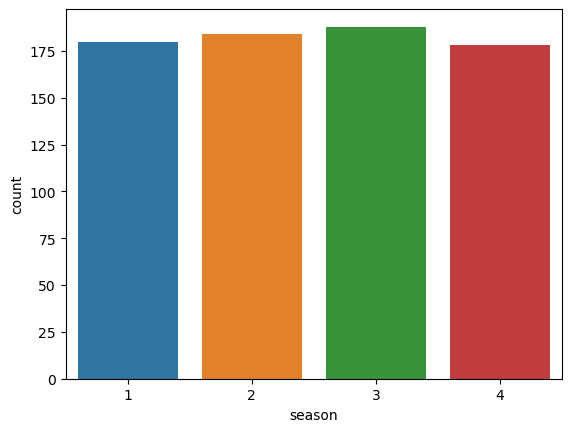

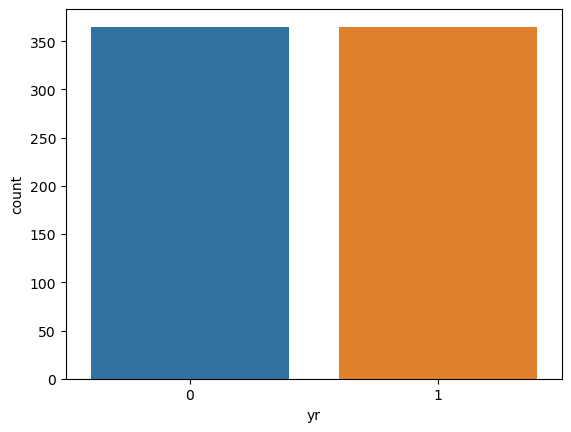

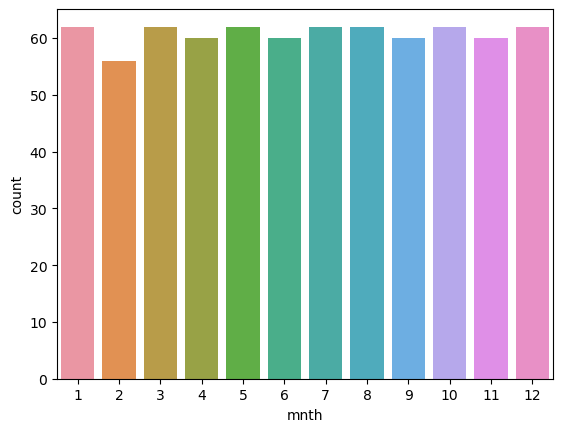

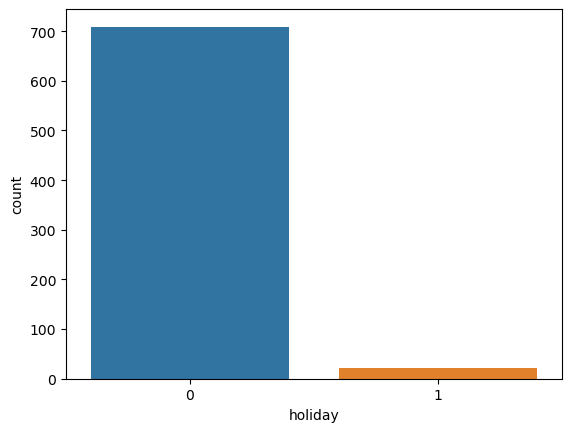

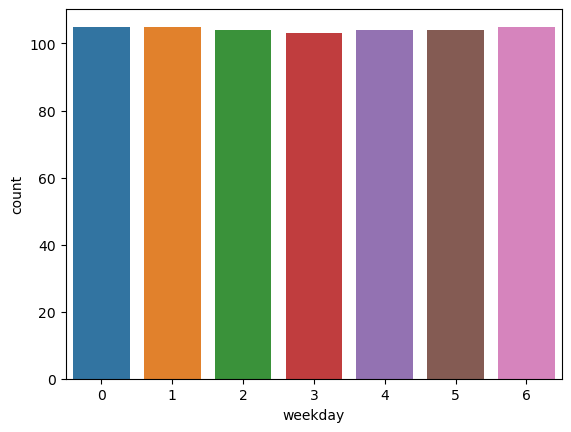

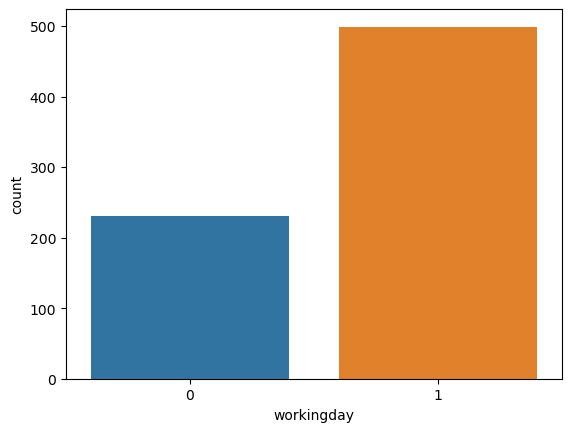

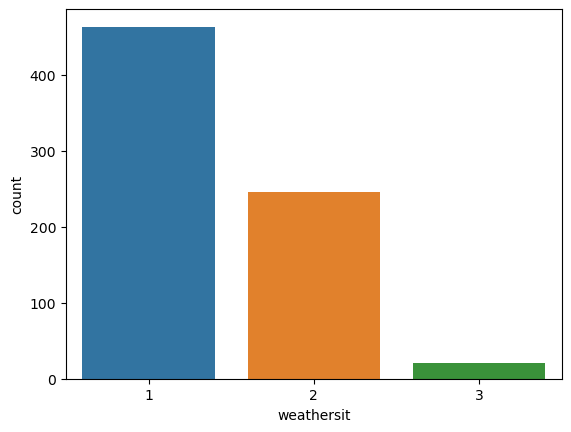

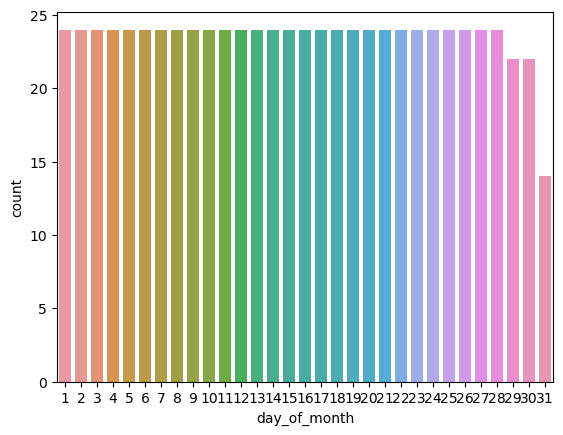

In [15]:
# Plot for categorical variable
for i in cat_col:
    sns.countplot(x=df[i])
    plt.show()

### Bivariate Analysis

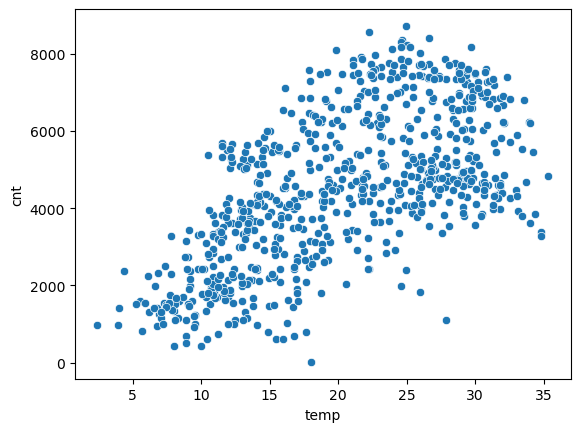

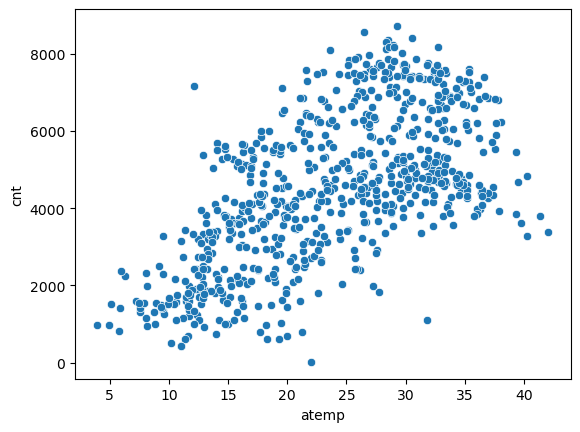

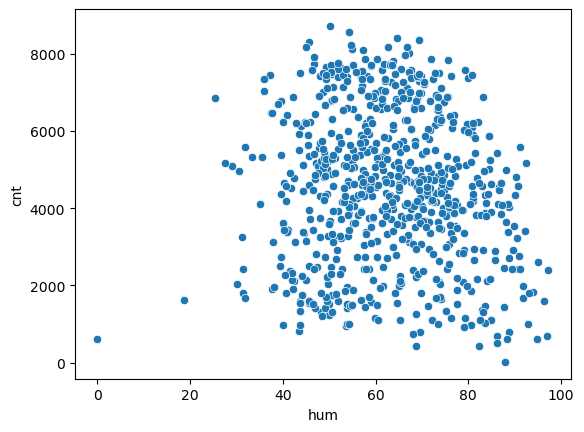

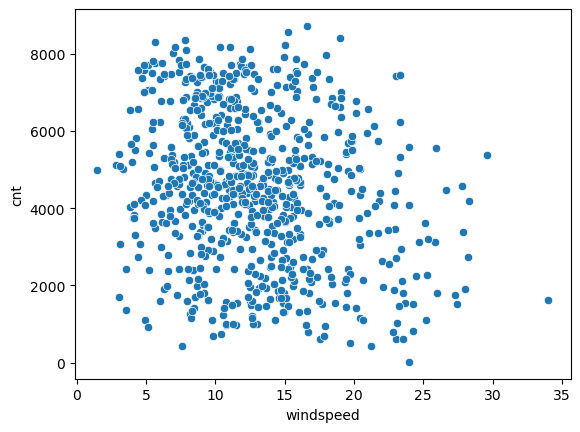

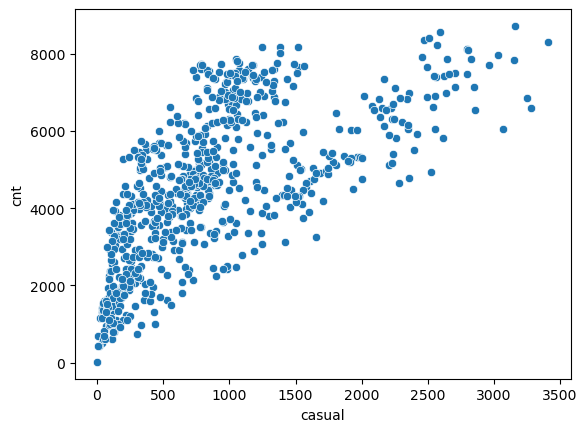

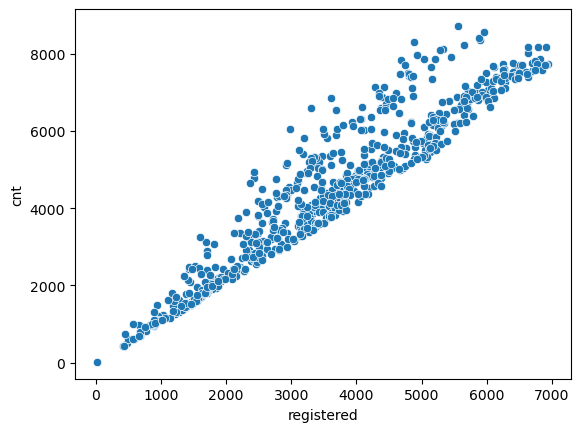

In [16]:
for i in cont_col:
    sns.scatterplot(x=df[i],y=df['cnt'])
    plt.show()

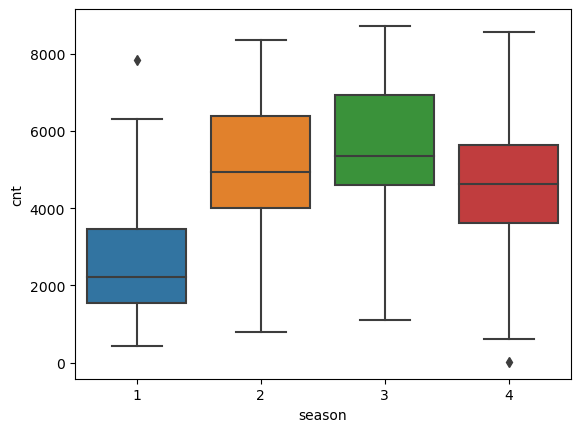

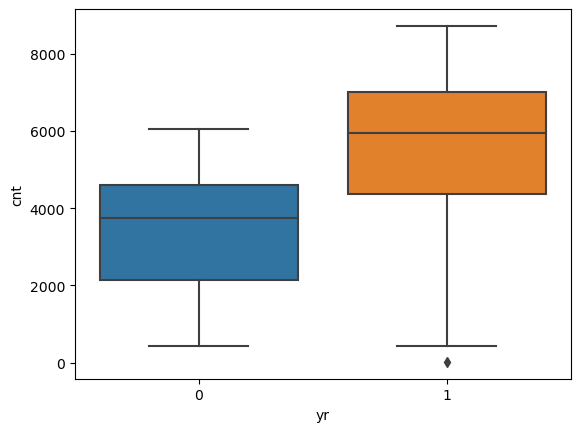

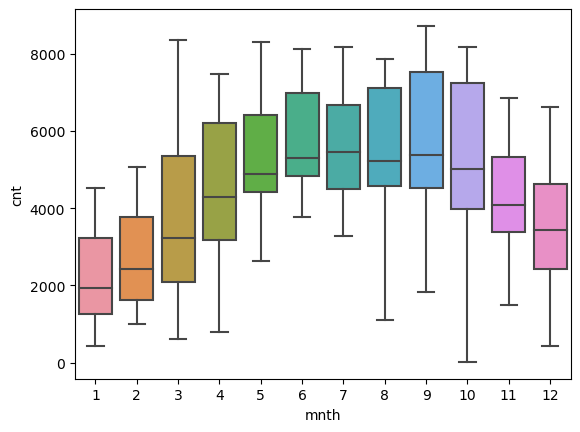

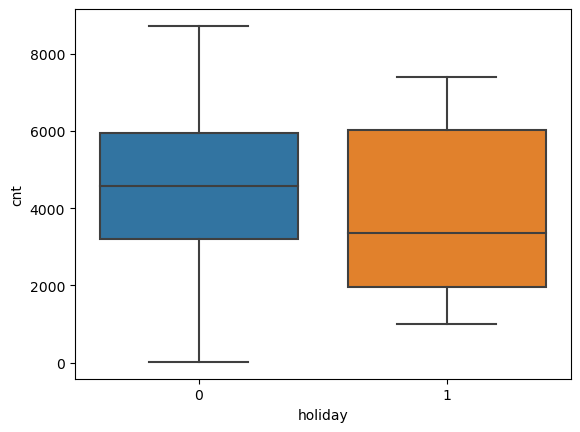

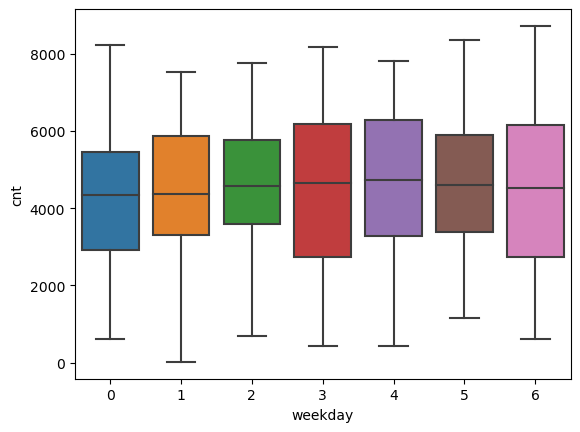

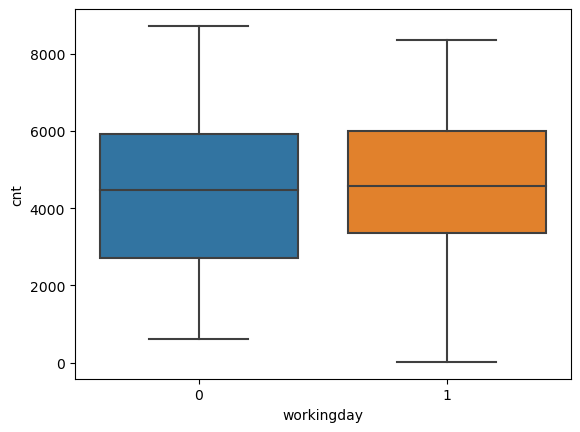

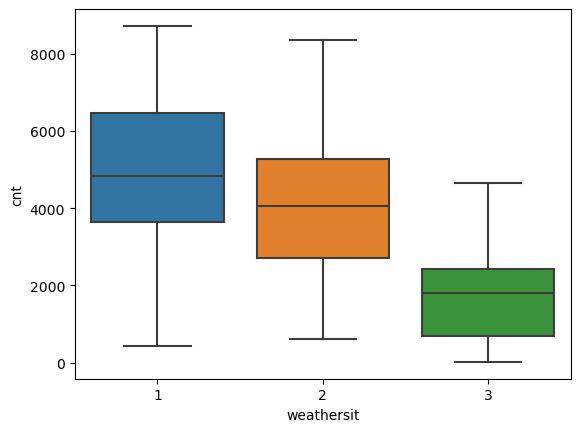

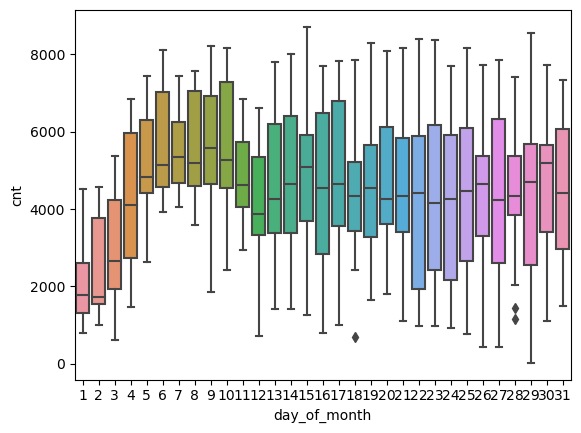

In [17]:
# Checking the spread as compared to target variable
for i in cat_col:
    sns.boxplot(x=df[i],y=df['cnt'])
    plt.show()

<Axes: xlabel='day_of_month', ylabel='cnt'>

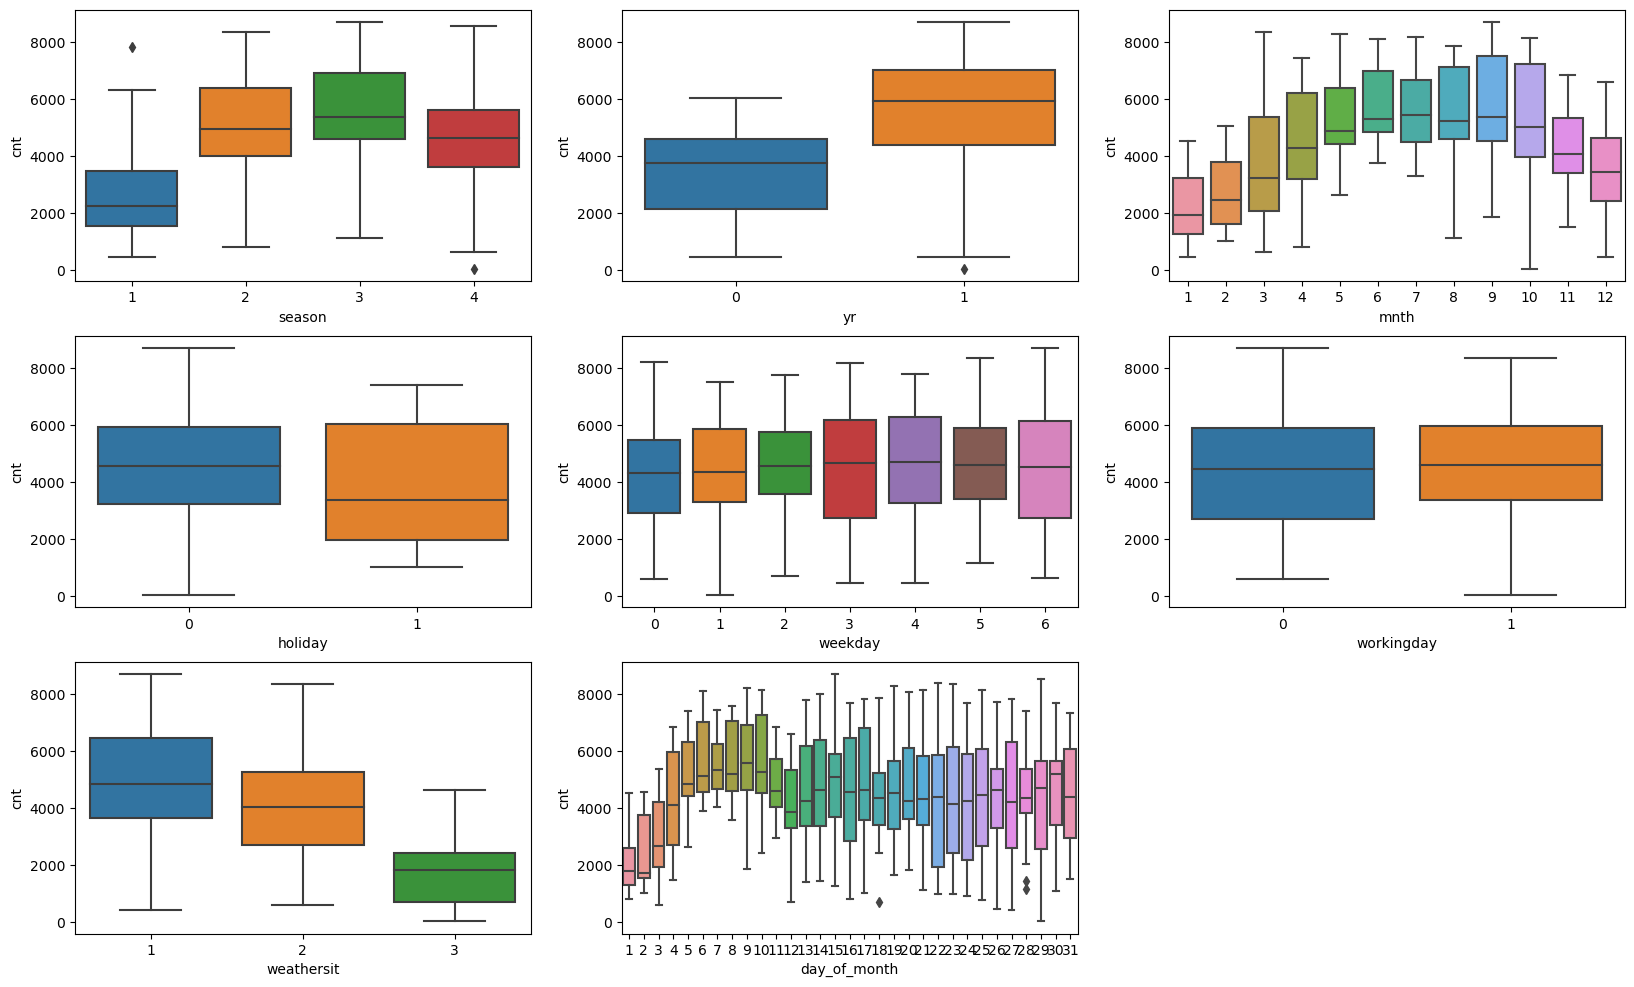

In [18]:
# visualizing categorical variable
plt.figure(figsize=(20,12))

plt.subplot(3,3,1) # To plot many plot in one graph. 2 Rows and 3 Columns. Below is the 1st one
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df)

plt.subplot(3,3,8)
sns.boxplot(x='day_of_month',y='cnt',data=df)


### Multivariate Analysis

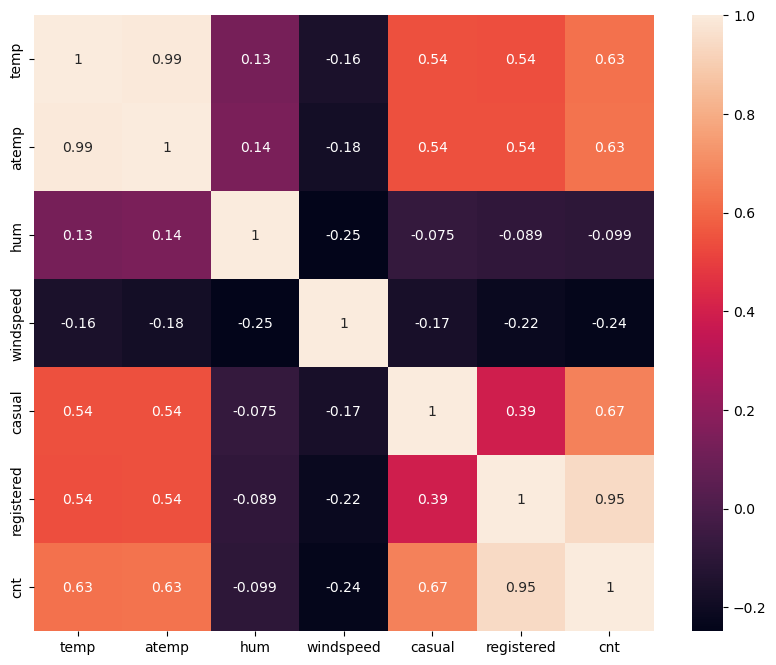

In [19]:
# Plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[cont_col+['cnt']].corr(),annot=True)
plt.show()

### Pre-Processing
    - Dummy variable creation
        - First Decide for which columns dummy variables needs to be created.
        - It cannot be continuous columns.
        - It has to be categorical columns with non-binary values, more that two
    - Scaling
        - Using Standardization

In [20]:
# Getting the unique values
df[cat_col].nunique()

season           4
yr               2
mnth            12
holiday          2
weekday          7
workingday       2
weathersit       3
day_of_month    31
dtype: int64

In [21]:
# Creating the Dummy values
season=pd.get_dummies(df['season'],drop_first=True)
mnth=pd.get_dummies(df['mnth'],drop_first=True)
weekday=pd.get_dummies(df['weekday'],drop_first=True)
weathersit=pd.get_dummies(df['weathersit'],drop_first=True)
day_of_month=pd.get_dummies(df['day_of_month'],drop_first=True)

# Replacing the dummy columns names with their DataDict meaning, to make the dataframe readable
season.columns = ['Summer','Fall','Winter']
mnth.columns = ['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
weekday.columns = ['Mon','Tue','Wed','Thu','Fri','Sat']
weathersit.columns= ['Mist','Snow']

In [22]:
# Concatinating the Parent Dataframe with the newely created Dataframes
df1=pd.concat([df,season,mnth,weekday,weathersit,day_of_month],axis=1)
df1.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  ...  22  23  24  25  26  27  28  29  30  31  
0  18.18125  80.5833  ...   0   0   0   0   0   0   0   0   0   0  
1  17.68695  69.6087  ...   0   0   0   0   0   0   0   0   0   0  
2   9.47025  43.7273  ...   0   0   0   0   0   0   0   0   0   0  
3  10.60610  59.0435  ...   0   0   0   0   0   0   0   0   0   0  
4  11.46350  43.6957  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 67 columns]

In [23]:
# Dropping the columns for which we have created the dummy variable columns
df1=df1.drop(['season','mnth','weekday','weathersit','day_of_month'],axis=1)

In [24]:
df1.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  casual  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0        0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0        0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0        0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0        0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  ...  22  23  24  25  26  27  28  29  30  31  
0         654   985  ...   0   0   0   0   0   0   0   0   0   0  
1         670   801  ...   0   0   0   0   0   0   0   0   0   0  
2        1229  1349  ...   0   0   0   0   0   0   0   0   0   0  
3        1454  1562  ...   0   0   0   0   0   0   0   0   0   0  
4        1518  1600  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 62 columns]

In [25]:
df1.shape

(730, 62)

### Splitting the dataset into Train-Test

In [26]:
# First creating the X and y data
X=df1.drop(['cnt'],axis=1)
y=df1['cnt']

In [27]:
print(X.shape)
print(y.shape)

(730, 61)
(730,)


In [28]:
# Coverting the numeric column names to string
X.columns=X.columns.astype(str)

In [29]:
# Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=100)

In [30]:
print(X_train.shape)
print(y_train.shape)

(584, 61)
(584,)


### Scaling using Standardisation

In [31]:
# STandardizing the X_train/X_test values
X_train=(X_train-X_train.mean())/X_train.std()
X_test=(X_test-X_test.mean())/X_test.std()

In [32]:
X_train.describe()

yr       holiday    workingday          temp         atemp  \
count  5.840000e+02  5.840000e+02  5.840000e+02  5.840000e+02  5.840000e+02   
mean  -1.672939e-16  3.650048e-17 -5.170902e-17 -3.330669e-16 -8.364694e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.026903e+00 -1.676925e-01 -1.416639e+00 -2.384949e+00 -2.424491e+00   
25%   -1.026903e+00 -1.676925e-01 -1.416639e+00 -8.755902e-01 -8.568143e-01   
50%    9.721346e-01 -1.676925e-01  7.046873e-01  3.451280e-02  8.212405e-02   
75%    9.721346e-01 -1.676925e-01  7.046873e-01  8.835591e-01  8.378676e-01   
max    9.721346e-01  5.953084e+00  7.046873e-01  2.052872e+00  2.300000e+00   

                hum     windspeed        casual    registered        Summer  \
count  5.840000e+02  5.840000e+02  5.840000e+02  5.840000e+02  5.840000e+02   
mean  -1.095014e-16  4.866731e-17 -1.825024e-17  1.368768e-17  4.866731e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.503570e+00 -1.900271e+00 -1.252668e+00 -2.280562e+00 -5.715876e-01   
25%   -7.880159e-01 -7.155013e-01 -7.845418e-01 -7.501985e-01 -5.715876e-01   
50%    2.922729e-02 -1.469133e-01 -1.903955e-01 -4.291093e-03 -5.715876e-01   
75%    7.132411e-01  5.410003e-01  3.718752e-01  7.536824e-01 -5.715876e-01   
max    2.430347e+00  4.048062e+00  3.611696e+00  2.060744e+00  1.746518e+00   

       ...            22            23            24            25  \
count  ...  5.840000e+02  5.840000e+02  5.840000e+02  5.840000e+02   
mean   ... -1.520853e-17  3.041707e-17 -3.041707e-18 -2.433366e-17   
std    ...  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    ... -1.881496e-01 -1.622248e-01 -1.929671e-01 -1.730058e-01   
25%    ... -1.881496e-01 -1.622248e-01 -1.929671e-01 -1.730058e-01   
50%    ... -1.881496e-01 -1.622248e-01 -1.929671e-01 -1.730058e-01   
75%    ... -1.881496e-01 -1.622248e-01 -1.929671e-01 -1.730058e-01   
max    ...  5.305819e+00  6.153729e+00  5.173356e+00  5.770254e+00   

                 26            27            28            29            30  \
count  5.840000e+02  5.840000e+02  5.840000e+02  5.840000e+02  5.840000e+02   
mean   4.258390e-17 -1.216683e-17  5.475072e-17  3.954219e-17  5.018816e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.832232e-01 -1.676925e-01 -1.832232e-01 -1.781787e-01 -1.832232e-01   
25%   -1.832232e-01 -1.676925e-01 -1.832232e-01 -1.781787e-01 -1.832232e-01   
50%   -1.832232e-01 -1.676925e-01 -1.832232e-01 -1.781787e-01 -1.832232e-01   
75%   -1.832232e-01 -1.676925e-01 -1.832232e-01 -1.781787e-01 -1.832232e-01   
max    5.448479e+00  5.953084e+00  5.448479e+00  5.602732e+00  5.448479e+00   

                 31  
count  5.840000e+02  
mean   1.977109e-17  
std    1.000000e+00  
min   -1.447173e-01  
25%   -1.447173e-01  
50%   -1.447173e-01  
75%   -1.447173e-01  
max    6.898191e+00  

[8 rows x 61 columns]

### Feature Selection

In [33]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=10)

selector=selector.fit(X_train,y_train)
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('yr', False, 28),
 ('holiday', False, 13),
 ('workingday', False, 15),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 23),
 ('casual', True, 1),
 ('registered', True, 1),
 ('Summer', False, 18),
 ('Fall', True, 1),
 ('Winter', False, 5),
 ('Feb', False, 39),
 ('Mar', False, 30),
 ('Apr', False, 7),
 ('May', True, 1),
 ('Jun', False, 20),
 ('Jul', False, 40),
 ('Aug', False, 19),
 ('Sep', False, 16),
 ('Oct', True, 1),
 ('Nov', False, 29),
 ('Dec', False, 6),
 ('Mon', False, 25),
 ('Tue', False, 12),
 ('Wed', False, 26),
 ('Thu', False, 33),
 ('Fri', False, 24),
 ('Sat', False, 45),
 ('Mist', False, 47),
 ('Snow', False, 8),
 ('2', False, 36),
 ('3', False, 37),
 ('4', False, 41),
 ('5', True, 1),
 ('6', False, 34),
 ('7', False, 31),
 ('8', False, 21),
 ('9', False, 14),
 ('10', False, 49),
 ('11', False, 22),
 ('12', False, 11),
 ('13', False, 51),
 ('14', False, 38),
 ('15', False, 17),
 ('16', False, 27),
 ('17', False, 50),
 ('18', True, 1),
 (

In [34]:
X_train.columns[selector.support_]

Index(['atemp', 'hum', 'casual', 'registered', 'Fall', 'May', 'Oct', '5', '18',
       '27'],
      dtype='object')

In [35]:
X_train_selected=X_train.columns[selector.support_]
X_test_selected=X_test.columns[selector.support_]

In [36]:
X_train=X_train[X_train_selected]
X_test=X_test[X_test_selected]

### Model Creation
    - Adding a constant
    - Creating models

In [37]:
X_train_sm=sm.add_constant(X_train)

#### First Model

In [38]:
ls_model_01=sm.OLS(y_train,X_train_sm).fit()
ls_model_01.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.806e+31
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:31:15   Log-Likelihood:                 14707.
No. Observations:                 584   AIC:                        -2.939e+04
Df Residuals:                     573   BIC:                        -2.934e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671   1.17e-13   3.86e+16      0.000    4505.267    4505.267
atemp      -8.527e-13    2.2e-13     -3.870      0.000   -1.29e-12    -4.2e-13
hum         1.293e-12   1.26e-13     10.256      0.000    1.05e-12    1.54e-12
casual       674.4972   1.46e-13   4.62e+15      0.000     674.497     674.497
registered  1595.3723   1.46e-13   1.09e+16      0.000    1595.372    1595.372
Fall        1.705e-13    1.8e-13      0.950      0.343   -1.82e-13    5.23e-13
May         5.684e-14   1.67e-13      0.340      0.734   -2.71e-13    3.85e-13
Oct        -2.558e-13   1.27e-13     -2.016      0.044   -5.05e-13   -6.56e-15
5           -1.99e-13   1.51e-13     -1.317      0.188   -4.96e-13    9.78e-14
18           -5.4e-13   1.17e-13     -4.598      0.000   -7.71e-13   -3.09e-13
27          8.384e-13   1.17e-13      7.150      0.000    6.08e-13    1.07e-12
==============================================================================
Omnibus:                        0.639   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.480
Skew:                          -0.045   Prob(JB):                        0.787
Kurtosis:                       3.107   Cond. No.                         3.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Above p-values shows that May column has the highest p-value deviation from .05, so dropping the column
X_train_sm=X_train_sm.drop(['May'],axis=1)


#### Second Model

In [40]:
ls_model_02=sm.OLS(y_train,X_train_sm).fit()
ls_model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.600e+31
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:31:15   Log-Likelihood:                 15003.
No. Observations:                 584   AIC:                        -2.999e+04
Df Residuals:                     574   BIC:                        -2.994e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671   7.03e-14    6.4e+16      0.000    4505.267    4505.267
atemp       7.958e-13   1.26e-13      6.292      0.000    5.47e-13    1.04e-12
hum         3.411e-13   7.53e-14      4.531      0.000    1.93e-13    4.89e-13
casual       674.4972    8.8e-14   7.67e+15      0.000     674.497     674.497
registered  1595.3723   8.79e-14   1.81e+16      0.000    1595.372    1595.372
Fall        1.052e-12      1e-13     10.508      0.000    8.55e-13    1.25e-12
Oct         5.542e-13   7.48e-14      7.412      0.000    4.07e-13    7.01e-13
5          -2.842e-14   7.29e-14     -0.390      0.697   -1.72e-13    1.15e-13
18          2.842e-14   7.07e-14      0.402      0.688    -1.1e-13    1.67e-13
27          4.405e-13   7.05e-14      6.247      0.000    3.02e-13    5.79e-13
==============================================================================
Omnibus:                       27.830   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.626
Skew:                          -0.528   Prob(JB):                     3.69e-07
Kurtosis:                       2.679   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Above p-values shows that 5 column has the highest p-value deviation from .05, so dropping the column
X_train_sm=X_train_sm.drop(['5'],axis=1)


#### Third Model

In [42]:
ls_model_03=sm.OLS(y_train,X_train_sm).fit()
ls_model_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.633e+31
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:31:15   Log-Likelihood:                 14845.
No. Observations:                 584   AIC:                        -2.967e+04
Df Residuals:                     575   BIC:                        -2.963e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4505.2671   9.22e-14   4.89e+16      0.000    4505.267    4505.267
atemp        1.08e-12   1.64e-13      6.586      0.000    7.58e-13     1.4e-12
hum         6.537e-13   9.86e-14      6.629      0.000     4.6e-13    8.47e-13
casual       674.4972   1.15e-13   5.85e+15      0.000     674.497     674.497
registered  1595.3723   1.15e-13   1.39e+16      0.000    1595.372    1595.372
Fall       -4.547e-13   1.28e-13     -3.563      0.000   -7.05e-13   -2.04e-13
Oct         3.268e-13   9.72e-14      3.363      0.001    1.36e-13    5.18e-13
18         -6.253e-13   9.25e-14     -6.757      0.000   -8.07e-13   -4.44e-13
27          1.698e-12   9.24e-14     18.388      0.000    1.52e-12    1.88e-12
==============================================================================
Omnibus:                      345.488   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3269.612
Skew:                          -2.496   Prob(JB):                         0.00
Kurtosis:                      13.462   Cond. No.                         3.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Above Stats Looks good, now checking the VIF Stats too
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

Feature       VIF
0       const  1.000000
1       atemp  3.158784
2         hum  1.142441
3      casual  1.561806
4  registered  1.557444
5        Fall  1.913074
6         Oct  1.109570
7          18  1.005799
8          27  1.001955

In [44]:
# Above VIF Stats also looks good, no value is greater than 5
# The Prob(F-Statistic) is also zero , so we are good

##### Residual Analysis

<Axes: title={'center': 'Error Distribution'}, ylabel='Density'>

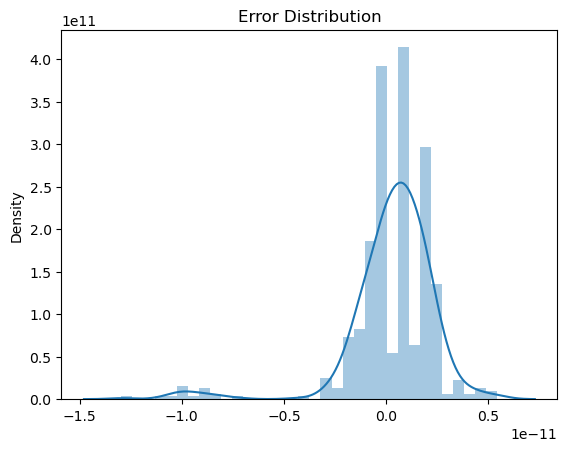

In [45]:
y_train_pred=ls_model_03.predict(X_train_sm)
res=y_train-y_train_pred
plt.title("Error Distribution")
sns.distplot(res)


#### Validating the Model for Test Data
    - Make sure scaling is done for Test Data
    - Test data columns as relected as per RFE output
    - Drop the same columns in Test Data that we dropped for Train data
    - Test the model by evaluating r2_score

In [46]:
X_test_sm=sm.add_constant(X_test)
X_test_sm=X_test_sm.drop(['May','5'],axis=1)

In [47]:
X_test_sm.head()

const     atemp       hum    casual  registered      Fall       Oct  \
184    1.0  1.021559  0.137062  3.002679   -0.482794  1.594815 -0.239946   
535    1.0  1.349884 -0.165012  0.018288    1.187589 -0.622737 -0.239946   
299    1.0 -0.209828  1.290418 -0.841783   -0.878281 -0.622737  4.139064   
221    1.0  1.137186 -1.271680  0.034618    0.166682  1.594815 -0.239946   
152    1.0  0.894651 -2.057063 -0.166791    0.404398 -0.622737 -0.239946   

          18        27  
184 -0.22364 -0.239946  
535 -0.22364 -0.239946  
299 -0.22364  4.139064  
221 -0.22364 -0.239946  
152 -0.22364 -0.239946

In [48]:
# Predicting the target variable using the model created by Train data
y_test_pred=ls_model_03.predict(X_test_sm)

In [49]:
# Evaluating the R2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.991928171800035

In [50]:
# The r2 score from test data matches closely with train data, so our model looks good.

##### Subjective Questions Work

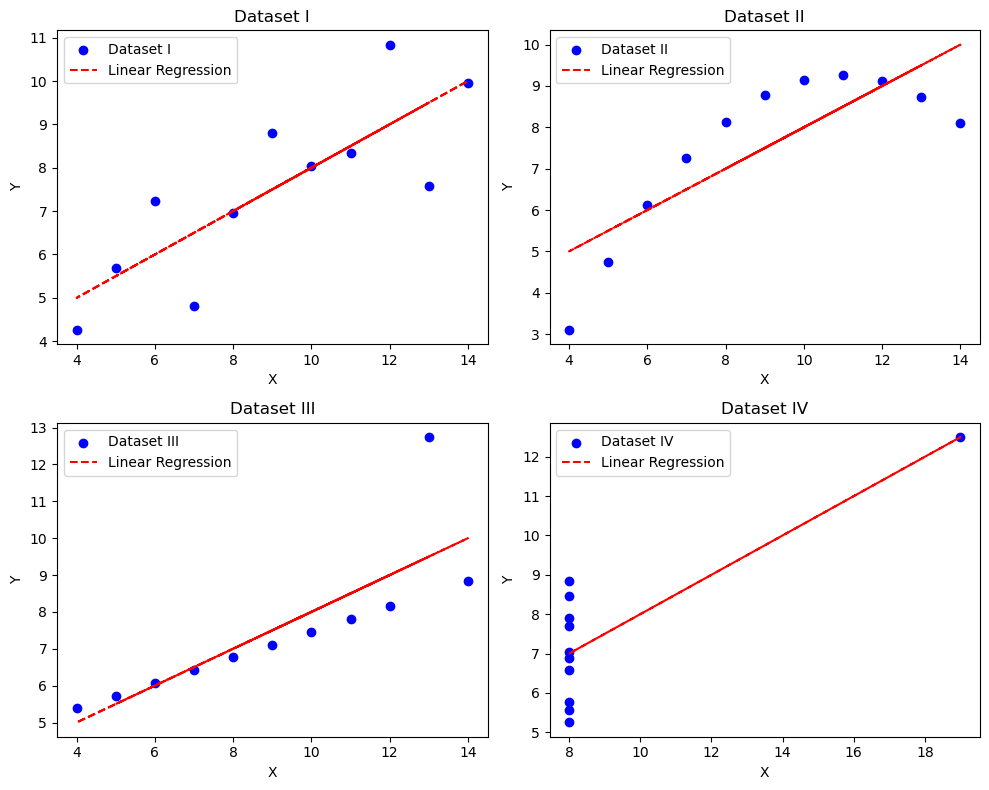

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Anscombe's quartet data
data = {
    'I': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]},
    'II': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]},
    'III': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], 'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]},
    'IV': {'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8], 'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]}
}

# Create subplots for each dataset
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot each dataset
for ax, (label, values) in zip(axs.flatten(), data.items()):
    x = np.array(values['x'])
    y = np.array(values['y'])

    # Scatter plot
    ax.scatter(x, y, label=f'Dataset {label}', color='blue')

    # Linear regression line
    slope, intercept, _, _, _ = linregress(x, y)
    line = slope * x + intercept
    ax.plot(x, line, color='red', linestyle='--', label='Linear Regression')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Dataset {label}')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Text(0.5, 1.0, 'Fitted vs Residual')

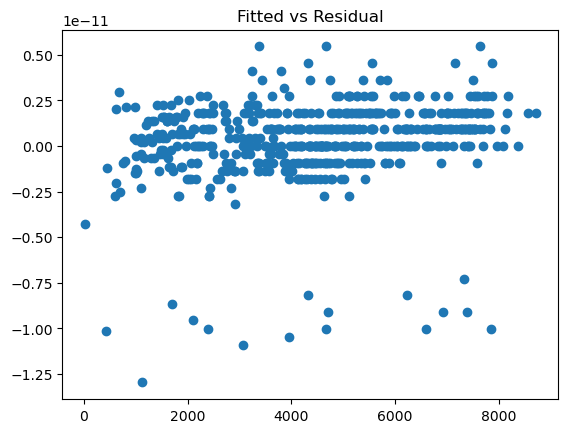

In [52]:
# Verifying Homoscedasticity
plt.scatter(x=y_train_pred,y=res)
plt.title('Fitted vs Residual')

In [53]:
# Verifying Independence of Residuals
residuals = ls_model_03.resid

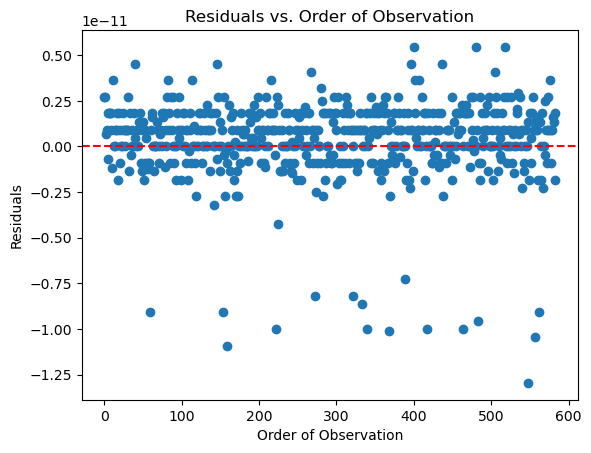

In [54]:
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Order of Observation')
plt.xlabel('Order of Observation')
plt.ylabel('Residuals')
plt.show()